In [1]:
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from bookdbtool.repl_tools import *
from bookdbtool.visualizations import running_total_comparison, yearly_comparisons

bc = BC_Tool()

In [3]:
target_year = "2022"
bc.summary_books_read_by_year(target_year)

        
  YEAR   PAGES READ  BOOKS READ  
    
  2022   6030.0      17          



In [4]:
bc.MINIMAL_BOOK_INDEXES = [1,2,7,13]
bc.books_read_by_year(target_year)
dfl = bc.result

          
  TITLE                                                                                    AUTHOR                   PAGES  READDATE    
    
  The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race        Isaacson, Walter         500    2022-01-06  
  Godel, Escher, Bach                                                                      Hofstadter, Douglas R    776    2022-01-19  
  Turn the Ship Around!: A True Story of Turning Followers into Leaders                    Marquet, L. David        274    2022-01-19  
  Man's Search for Meaning                                                                 Frankl, Viktor E.        165    2022-01-23  
  Dine': A history of the navajos                                                          Iverson, Peter           386    2022-01-24  
  Future Perfect: The Case For Progress In A Networked Age                                 Johnson, Steven          272    2022-02-08  
  Confessions of a Recovering En

In [5]:
dfl.style

,BookCollectionID,Title,Author,CopyrightDate,ISBNNumber,PublisherName,CoverType,Pages,Category,Note,Recycled,Location,ISBNNumber13,ReadDate
0,1600,"The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race","Isaacson, Walter",2021-01-01,1982115858,Simon and Shuster,Hard,500,None,,0,Main Collection,9781982115852,2022-01-06
1,108,"Godel, Escher, Bach","Hofstadter, Douglas R",1979-01-01,0394756827,Vintage,Soft,776,Philosophy,Finished from about pg 350 after a break of a few years. AI sections at the end are interesting and also feel thin and naive (after 40 years!).,0,Main Collection,9780394756820,2022-01-19
2,1601,Turn the Ship Around!: A True Story of Turning Followers into Leaders,"Marquet, L. David",2013-01-01,B00AFPVP0Y,Portfolio,Soft,274,None,Recommended by Brian Maloney and someone else within a day or so of each other. Revisit often!,0,Main Collection,,2022-01-19
3,1602,Man's Search for Meaning,"Frankl, Viktor E.",1959-01-01,,Beacon Press,Soft,165,None,,0,Main Collection,9780807014271,2022-01-23
4,1353,Dine': A history of the navajos,"Iverson, Peter",2002-01-01,,University of New Mexico Press,Soft,386,None,Museum Bookstore Santa Fe 2011-12,0,Main Collection,9780826327154,2022-01-24
5,1603,Future Perfect: The Case For Progress In A Networked Age,"Johnson, Steven",2012-01-01,,Riverhead Books,Digital,272,None,"Dated, fast read. Interesting.",0,DOWNLOAD,9781594488207,2022-02-08
6,1604,Confessions of a Recovering Engineer: Transportation for a Strong Town,"Marohn Jr., Charles L.",2021-01-01,1119699290,Wiley,Hard,272,None,Tattered Cover,0,Main Collection,9781119699293,2022-02-22
7,1605,"Command and Control: Nuclear Weapons, the Damascus Accident, and the Illusion of Safety","Schlosser, Eric",2013-01-01,,Penguin Books,Soft,480,None,Recommended by Andrew. Crazy story of risk and deception.,0,Main Collection,9780143125785,2022-02-23
8,1418,Love in the Time of Cholera,"Marquez, Gabriel Garcia",1988-01-01,,Vintage International,Soft,348,None,"Originally, for a Twitter talk about the cholera flag analogy. I didn't love reading this book, esp as the outcome became clear to me, about half way through the book. The utter humiliation of the human condition is vivid. The reverence for first love seems over done. I don't quite get it, maybe?",0,Main Collection,9780307389732,2022-03-11
9,1200,"Madman Dreams of Turing Machines, A","Levin, Janna",2006-01-01,9781400032402,Anchor,Soft,230,None,Downloaded a talk by her about this book 2008-05-23. I reread this book without remembering one thing about having read it. I liked it very much in 2022. What happened the first time?,0,Main Collection,9781400032402,2022-03-18


In [6]:
dfl[["Pages"]].describe().style

,Pages
count,17
mean,354.706
std,141.692
min,165
25%,272
50%,305
75%,386
max,776


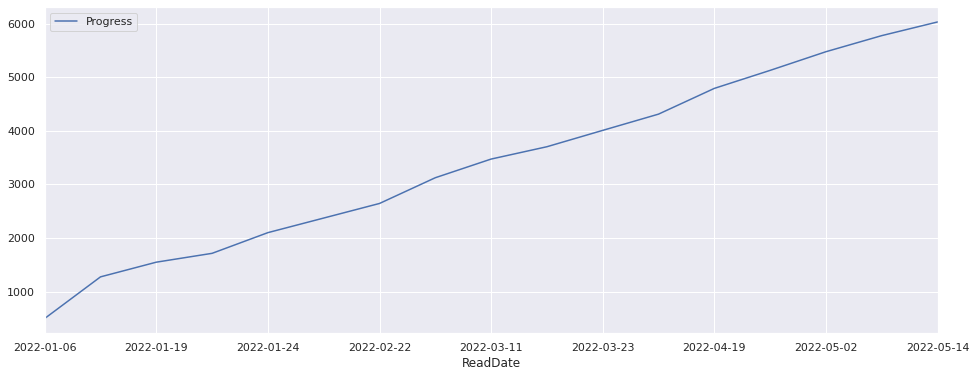

In [7]:
plot_size = [16,6]
dfl["Progress"] = dfl["Pages"].cumsum()
dfl.plot("ReadDate", "Progress", figsize=plot_size)

In [8]:
bc.summary_books_read_by_year()
df = bc.result
df["rank"] = df["pages read"].rank(ascending=False)
df.sort_values(by=["rank"], inplace=True)
df.reset_index()

        
  YEAR   PAGES READ  BOOKS READ  
    
  1966   4409.0      21          
  1984   1508.0      9           
  1985   2200.0      11          
  1986   3325.0      14          
  1987   3660.0      15          
  1988   4535.0      20          
  1989   5262.0      22          
  1990   2730.0      13          
  1991   4281.0      16          
  1992   2235.0      7           
  1993   4706.0      15          
  1994   4760.0      16          
  1995   4908.0      21          
  1996   5175.0      19          
  1997   2022.0      9           
  1998   5887.0      27          
  1999   7103.0      27          
  2000   6368.0      27          
  2001   6511.0      22          
  2002   6217.0      24          
  2003   9430.0      40          
  2004   6476.0      25          
  2005   10117.0     38          
  2006   7431.0      30          
  2007   9099.0      33          
  2008   8153.0      33          
  2009   8680.0      33          
  2010   11712.0     43          


,index,year,pages read,books read,rank
0,36,2019,12059.0,36,1.0
1,27,2010,11712.0,43,2.0
2,22,2005,10117.0,38,3.0
3,37,2020,9570.0,30,4.0
4,20,2003,9430.0,40,5.0
5,24,2007,9099.0,33,6.0
6,26,2009,8680.0,33,7.0
7,38,2021,8427.0,24,8.0
8,25,2008,8153.0,33,9.0
9,28,2011,7583.0,25,10.0


In [9]:
df.style

,year,pages read,books read,rank
36,2019,12059,36,1
27,2010,11712,43,2
22,2005,10117,38,3
37,2020,9570,30,4
20,2003,9430,40,5
24,2007,9099,33,6
26,2009,8680,33,7
38,2021,8427,24,8
25,2008,8153,33,9
28,2011,7583,25,10


In [10]:
df[["books read", "pages read"]].describe().style

,books read,pages read
count,40,40
mean,22.075,6031.35
std,8.82417,2536.79
min,7,1508
25%,16,4503.5
50%,21,5728
75%,27,7469
max,43,12059


In [11]:
now = df.loc[df.year == int(target_year)]
print(now)

    year  pages read  books read  rank
39  2022      6030.0          17  19.0


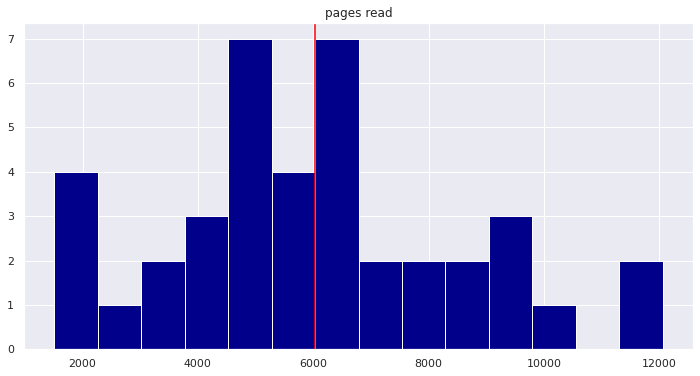

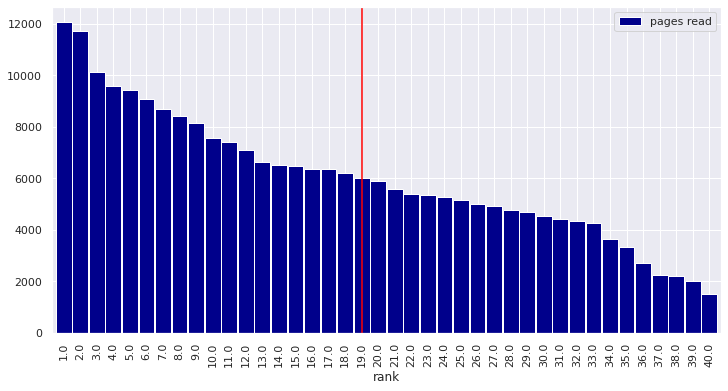

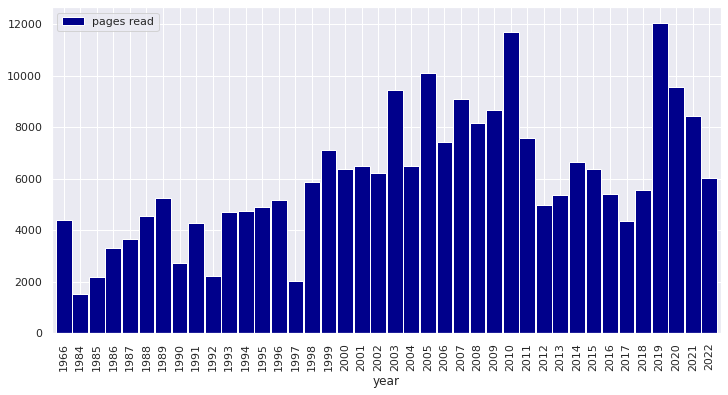

In [12]:
yearly_comparisons(df, int(target_year))

In [13]:
bc.books_read_by_year()
df = bc.result

          
  TITLE                                                                                           AUTHOR                                                         PAGES  READDATE    
    
  Hobbit, The                                                                                     Tolkien, J R R                                                 317    1966-05-25  
  King's Equal, The                                                                               Paterson, Katherine ill. Vagin, Vladimir                       64     1966-05-25  
  Asimov on Astronomy                                                                             Asimov, Isaac                                                  271    1966-05-25  
  Travels With Charley                                                                            Steinbeck, John                                                275    1966-05-25  
  Tortilla Flat                                                                

In [14]:
df.style

,BookCollectionID,Title,Author,CopyrightDate,ISBNNumber,PublisherName,CoverType,Pages,Category,Note,Recycled,Location,ISBNNumber13,ReadDate
0,278,"Hobbit, The","Tolkien, J R R",1966-01-01,0395282659,Houghton Mifflin,Soft,317,GenFiction,None,0,Main Collection,9780395282656,1966-05-25
1,346,"King's Equal, The","Paterson, Katherine ill. Vagin, Vladimir",1992-01-01,0060224967,Harper Collins,Hard,64,GenFiction,,1,Main Collection,9780060224967,1966-05-25
2,343,Asimov on Astronomy,"Asimov, Isaac",1975-01-01,0385068816,Anchor Doubleday,Soft,271,Astronomy,,1,Astronomy,9780385068819,1966-05-25
3,253,Travels With Charley,"Steinbeck, John",1962-01-01,0140053204,Penguin,Soft,275,Travel,None,0,Main Collection,9780140053203,1966-05-25
4,254,Tortilla Flat,"Steinbeck, John",1935-01-01,0140042407,Penguin,Soft,151,GenFiction,None,0,Main Collection,9780140042405,1966-05-25
5,937,Two Years Before the Mast,"Dana, Richard Henry",1936-01-01,None,Modern Library,Hard,443,NonFiction,Ebay $8 on 21 Jan 2004.,0,Main Collection,None,1966-05-25
6,255,Of Mice and Men,"Steinbeck, John",1937-01-01,014004891X,Penguin,Soft,270,GenFiction,Includes Cannery Row,0,Main Collection,9780140048919,1966-05-25
7,257,"Pastures of Heaven, The","Steinbeck, John",1932-01-01,0140049983,Penguin,Soft,243,GenFiction,None,0,Main Collection,9780140049985,1966-05-25
8,265,Russian Journal,"Steinbeck, John",1948-01-01,1557782253,Athena,Soft,220,Travel,,1,Main Collection,9781557782250,1966-05-25
9,296,Steps to Christ,"White, E G",1971-01-01,None,Inspiration Books,Soft,89,Religion,None,0,Main Collection,None,1966-05-25


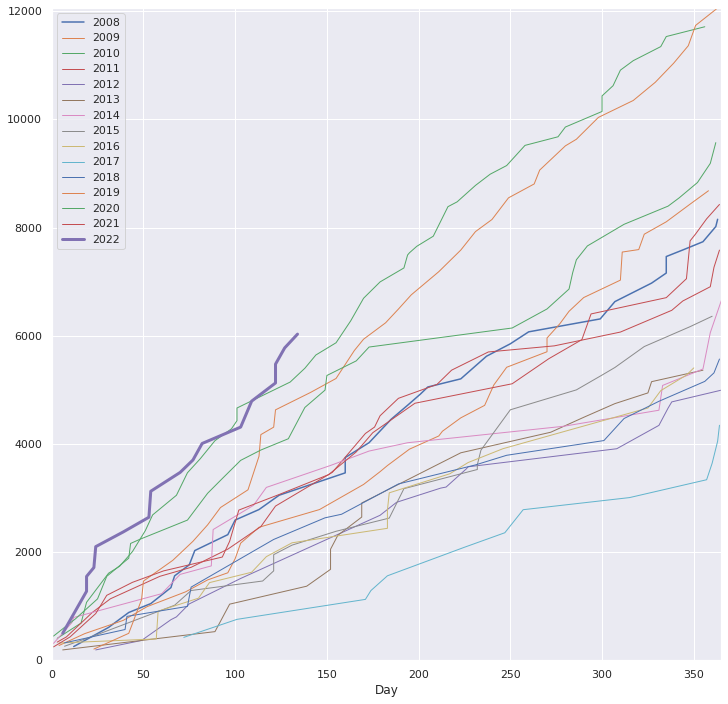

In [15]:
running_total_comparison(df, window=15)